In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("Elon_musk.csv",encoding="latin-1")

In [3]:
data.shape # No of tweets

(1999, 2)

In [4]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [5]:
data.drop(["Unnamed: 0"],inplace=True,axis=1)

In [6]:
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
data.isnull().sum()

Text    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


# Data Cleaning

In [10]:
''' Here we are removing irrelevant information like punctuations , digits , exclamations , alphanumeric etc '''

import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

#clean = lambda x: clean_text(x)

data["Text"] = data["Text"].apply(clean_text) # Clean The Text
data.head(11)



,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


In [ ]:
'''Before we go ahead and pre process the data , let us count the frequency of the words 
First let us concatenates all the text in the 'Text' column of the 'data' DataFrame into a single string using '' as separator
we then split them and 

'''

In [11]:
''' We observe that there are a lot of stop words , let us remove these '''
top_20_freq = pd.Series(' '.join(data["Text"]).split()).value_counts()[:20]
top_20_freq



the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

In [19]:
swords = stopwords.words("english")

data['Text'] = data["Text"].apply(lambda i : ' '.join(i for i in i.split() if i not in swords))

''' Removing all the stopwords after combining all the words and splitting and checking if they are not in the list of stopwords

In [22]:
top_20_freq = pd.Series(' '.join(data["Text"]).split()).value_counts()[:20]
top_20_freq

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
haha                55
nasaspaceflight     55
good                51
launch              49
sure                43
yeah                41
would               40
dtype: int64

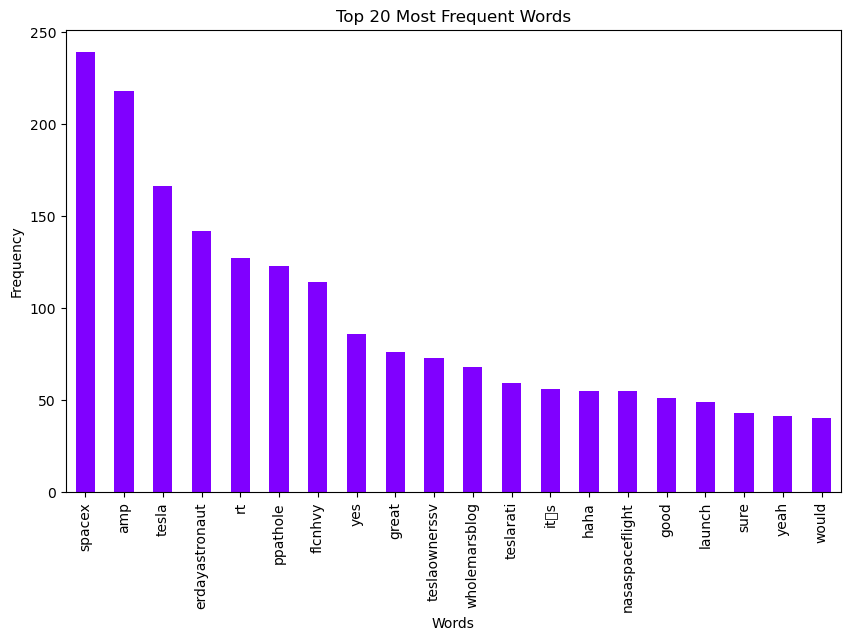

In [27]:
top_20_freq.plot(kind='bar', figsize=(10, 6),colormap='rainbow')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

#  IMPLEMENTING COUNTVECTORISER  : TO FETCH THE FREQUENCY OF THE WORDS AND TDM .( TERM DOCUMENT MATRIX)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)  # Frequency of terms in the document
X = vectorizer.fit_transform(data["Text"])

In [22]:
word_freq_df = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),  # fecthing all the names of the words 
    'occurrences': X.sum(axis=0).A1,   #total occurrences of each term in the text data after it has been transformed by the CountVectorizer
    # and converts it into 1d
    'frequency': X.sum(axis=0).A1 / X.sum() })  # Total occurences of each term/total terms 
                                                # Total count of all term occurrences in the entire corpus, not just for a specific term.

In [23]:
word_freq_df

,term,occurrences,frequency
0,aber,1,0.000052
1,able,6,0.000315
2,abo,1,0.000052
3,aboard,1,0.000052
4,abort,3,0.000157
...,...,...,...
4551,zshauladventure,1,0.000052
4552,zubinanary,1,0.000052
4553,zwiebelbach,1,0.000052
4554,zzcool,1,0.000052


#  IMPLEMENTING TFIDF ( TERM FREQ INVERSE DOC FREQUENCY ) 

WEIGHT OF TERM FREQ = TOTAL NO OF FREQ A TERM OCCURS IN AN DOCUMENT / NO OF TERMS IN TH DOCUMENT 
WEIGHT OF DOC FREQUENCY = OG( TOTAL NO OF DOCS/ NO OF TIMES TERM OCCURS IN THAT DOCUMENT )

TFIDF =  WEIGHT OF TERM FREQ   *   WEIGHT OF DOC FREQUENCY



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(stop_words="english",max_features=1000,max_df=0.5,smooth_idf=True)
tfidf_vector = vector.fit_transform(data["Text"])
names_features = vector.get_feature_names_out()
dense = tfidf_vector.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist,columns = names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterday,yourfavgas,yup,zero,zogfotpik,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-Gram

In [58]:
from collections import Counter
#from itertools import tee, islice
from nltk.util import ngrams
from nltk.corpus import stopwords


def get_top_n2_words(corpus, n=None):
    
    # Here we are firstly removing the stop words
    stop_words = set(stopwords.words("english")) 

        
    # Tokenize the text ( spillting the text into words) and generate bigrams ( using ngrams library)
    tokenized_corpus = [j for i in corpus for j in i.split() if j not in stop_words]
    bigrams = list(ngrams(tokenized_corpus, 2))

    # Count the occurrences of each bigram
    bigram_counts = Counter(bigrams)

    # Get the top n bigrams
    top_n_bigrams = bigram_counts.most_common(n)
    
    return top_n_bigrams







In [59]:
top2_words = get_top_n2_words(data["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(20)

,Bi-gram,Freq
0,"(rt, spacex)",71
1,"(spacex, falcon)",17
2,"(erdayastronaut, spacex)",16
3,"(pretty, much)",12
4,"(rt, nasa)",12
5,"(waemd, spacex)",11
6,"(giga, berlin)",10
7,"(first, stage)",10
8,"(teslaratiteam, teslarati)",10
9,"(nasa, spacex)",9


# Trigram

In [68]:
from nltk.tokenize import word_tokenize

def get_top_n3_words(corpus, n=None):
    
    # Here we are firstly removing the stop words
    stop_words = set(stopwords.words("english")) 

        
    # Tokenize the text ( spillting the text into words) and generate bigrams ( using ngrams library)
    tokenized_corpus = [j for i in corpus for j in i.split() if j not in stop_words]

    trigrams = list(ngrams(tokenized_corpus, 3))

    # Count the occurrences of each bigram
    trigram_counts = Counter(trigrams)

    # Get the top n bigrams
    top_n_trigrams = trigram_counts.most_common(n)
    
    return top_n_trigrams

In [69]:
top3_words = get_top_n3_words(data["Text"], n=200) #top 200
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(20)

,Tri-gram,Freq
0,"(rt, spacex, falcon)",17
1,"(falcon, s, first)",8
2,"(s, first, stage)",8
3,"(thesheetztweetz, waemd, spacex)",8
4,"(spacex, falcon, s)",7
5,"(course, still, love)",7
6,"(ppathole, thesheetztweetz, waemd)",7
7,"(waemd, spacex, spacexstarlink)",7
8,"(first, stage, landed)",6
9,"(rt, spacex, liftoff)",6


# Plotting Bigram and Trigram to visualise the most frequent words

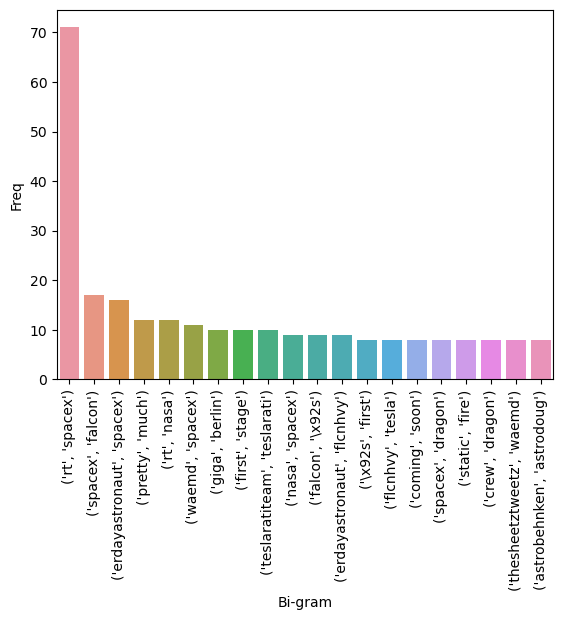

In [73]:
#Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns
top_20_bigram =  top2_df.iloc[:20,:]
sns.barplot(x=top_20_bigram["Bi-gram"], y =  top_20_bigram["Freq"] )
plt.xticks(rotation=90)
plt.show()

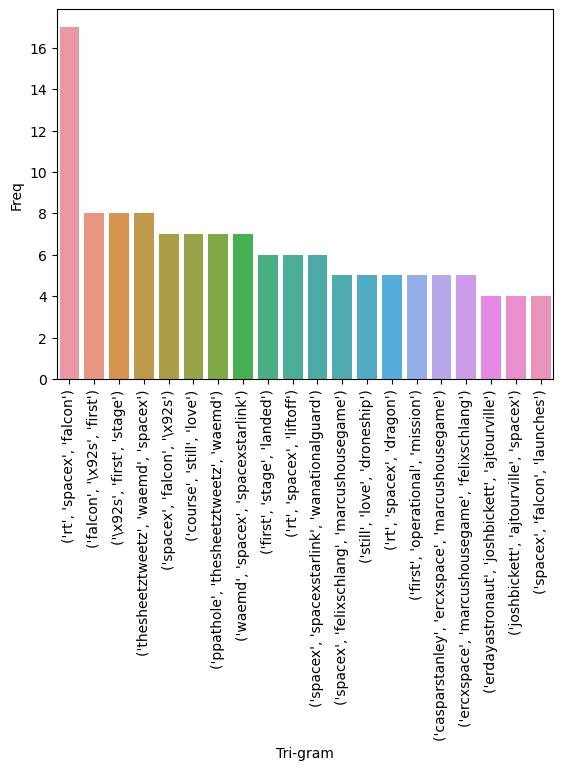

In [75]:
#Tri-gram plot

import matplotlib.pyplot as plt
import seaborn as sns
top_20_Trigram =  top3_df.iloc[:20,:]
sns.barplot(x=top_20_Trigram["Tri-gram"], y =  top_20_Trigram["Freq"] )
plt.xticks(rotation=90)
plt.show()

# Word cloud

In [79]:
pip install wordcloud


                                              0.0/151.4 kB ? eta -:--:--
     -------                                 30.7/151.4 kB 1.3 MB/s eta 0:00:01
     -----------------                     71.7/151.4 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 151.4/151.4 kB 1.1 MB/s eta 0:00:00


In [80]:
from wordcloud import WordCloud

In [81]:
textdata = " ".join(data["Text"])

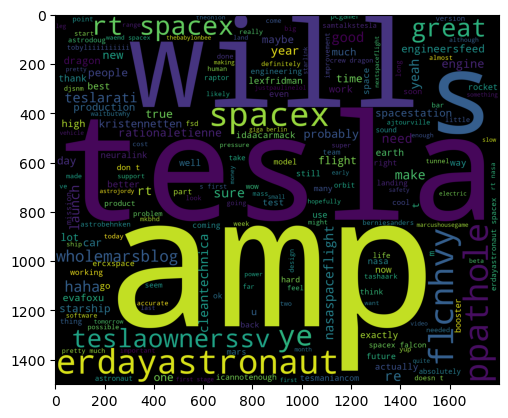

In [85]:
wc = WordCloud(background_color="black", width=1800, height=1500).generate(textdata)
plt.imshow(wc)

In [ ]:
    '''from this we can infer that the words amp tesla are used most no of time'''    

# SENTIMENT ANALYSIS : SUNJECTIVITY AND POLARITY

In [ ]:
'''sentiment.subjectivity :  returns the subjectivity score, which indicates how subjective or opinion-based the text is.

   sentiment.polarity returns the polarity score, which indicates the sentiment's positivity or negativity.
   
    Subjectivity is a measure of the degree to which language conveys personal, emotional,
    or opinionated content rather than just presenting neutral and factual information.
    Subjectivity is often quantified as a numerical value ranging from 0 to 1, 
    
    A subjectivity score of 0 indicates that the text is entirely objective, 
    meaning it contains purely factual and non-opinionated content.
    
    A subjectivity score of 1 means that the text is highly subjective and contains strong opinions, 
    emotions, or personal expressions.
    
    This score is often used in sentiment analysis to help determine the sentiment or emotional content of the text.
    
    
    It indicates whether the text expresses a positive, negative, or neutral sentiment. 
    Polarity is a measure of the overall sentiment or emotional tone conveyed by the text.
    
    
    A polarity score near zero or very close to zero typically suggests a neutral sentiment

In [92]:
from textblob import TextBlob

def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity,sentiment.polarity])

In [94]:
data[["subjectivity","polarity"]] = data.apply(sentiment_analysis,axis=1)
data.head(10)

,Text,subjectivity,polarity
0,im an alien,0.750000,-0.250000
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,teslacn congratulations tesla china for amazin...,0.366667,0.275000
5,happy new year of the ox,0.727273,0.468182
6,frodo was the underdoge\nall thought he would ...,0.400000,0.000000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely do not repre...,0.500000,0.000000
9,the most entertaining outcome is the most likely,0.675000,0.375000


In [95]:
def fetch_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity >= 0 else 'negative'

In [100]:
data.iloc[1,0]

'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it'

In [102]:
fetch_sentiment(data.iloc[3,0])

'positive'

In [103]:
fetch_sentiment(data.iloc[0,0])

'negative'

In [101]:
fetch_sentiment(data.iloc[1,0])

'positive'

In [96]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [104]:
data["analysis"] = data["polarity"].apply(analysis)

In [105]:
data.head()

,Text,subjectivity,polarity,analysis
0,im an alien,0.750000,-0.250,Negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000,Neutral
2,joerogan spotify great interview,0.750000,0.800,Positive
3,doge is underestimated,0.000000,0.000,Neutral
4,teslacn congratulations tesla china for amazin...,0.366667,0.275,Positive


In [ ]:
 data['analyize'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))
# 2 ways od defining analsyse the emotions 

In [107]:
data.head()

,Text,subjectivity,polarity,analysis,analyize
0,im an alien,0.750000,-0.250,Negative,negative
1,idaacarmack ray tracing on cyberpunk with hdr ...,0.000000,0.000,Neutral,neutral
2,joerogan spotify great interview,0.750000,0.800,Positive,positive
3,doge is underestimated,0.000000,0.000,Neutral,neutral
4,teslacn congratulations tesla china for amazin...,0.366667,0.275,Positive,positive


# Let us plot the no of positive and negative emotions

<Axes: xlabel='analysis', ylabel='count'>

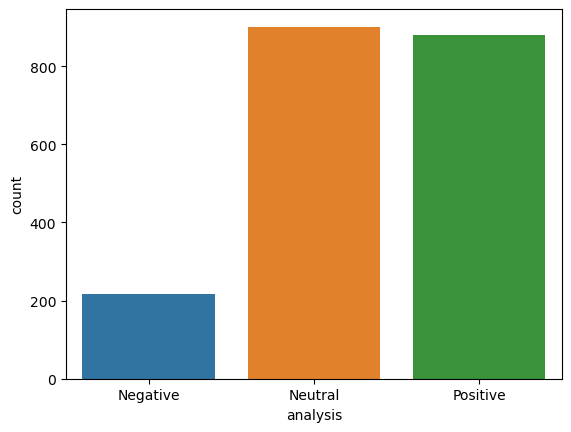

In [109]:
sns.countplot(x=data["analysis"])

In [ ]:
""" from this we can infer that the no of positive tweets are more than the negative"""

Text(0.5, 1.0, 'Scatter Plot of Polarity vs. Subjectivity')

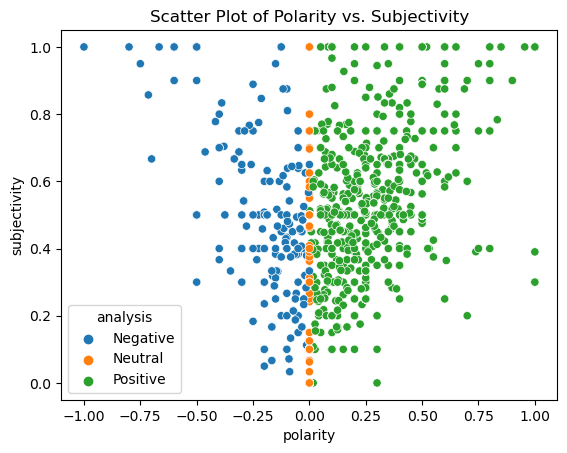

In [113]:
sns.scatterplot(data=data, x='polarity', y='subjectivity', hue='analysis')
plt.title("Scatter Plot of Polarity vs. Subjectivity")

<Axes: xlabel='polarity', ylabel='Count'>

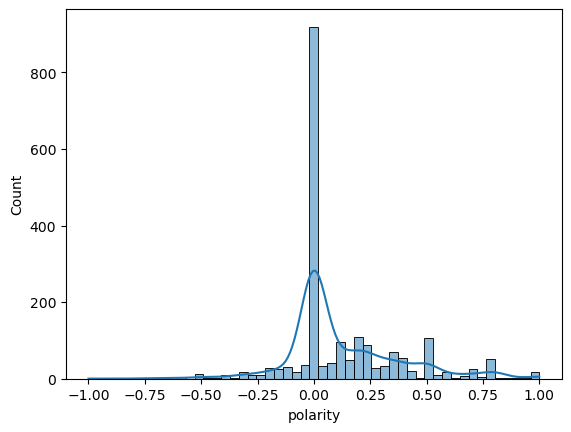

In [115]:
sns.histplot(data['polarity'], kde=True)


<Axes: xlabel='subjectivity', ylabel='Count'>

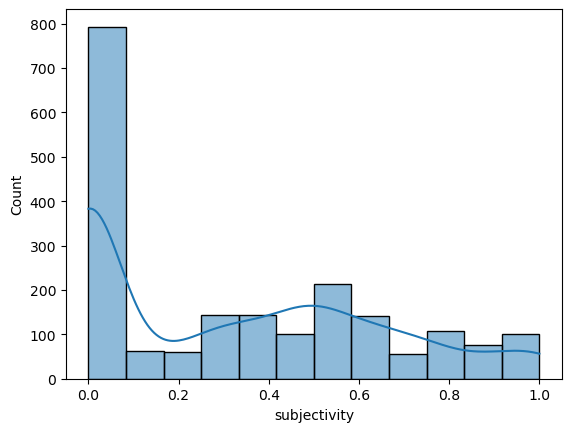

In [116]:
sns.histplot(data['subjectivity'], kde=True)


In [ ]:
# LET US RETRIVE THE POSITIVE AND NEGATIVE TWEETS SEPARATELY 

In [123]:
positive_tweets = data[data["analysis"]=="Positive"].sort_values(by='polarity', ascending=False)
negative_tweets = data[data["analysis"]=="Negative"].sort_values(by='polarity', ascending=False)

In [124]:
positive_tweets.head()

,Text,subjectivity,polarity,analysis,analyize
1723,renatakonkoly sneakyness mein herz brennt best...,0.3,1.0,Positive,positive
455,nytimes very impressive mission by china,1.0,1.0,Positive,positive
340,jack the greatest gatsby,1.0,1.0,Positive,positive
1080,erdayastronaut trevormahlmann johnkrausphotos ...,0.3,1.0,Positive,positive
300,tonychomrmagic teslaenergy one of the best tes...,0.3,1.0,Positive,positive


In [125]:
negative_tweets.head()

,Text,subjectivity,polarity,analysis,analyize
1739,teslarati should add a few miles of range more...,0.333333,-1.850372e-17,Negative,negative
746,would be great to hear from people who know a ...,0.650000,-1.850372e-17,Negative,negative
1416,flcnhvy giant gap between experimental medical...,0.566667,-4.166667e-03,Negative,negative
613,tashaark to be clear this was just an xpeng pr...,0.379167,-1.250000e-02,Negative,negative
881,samtalkstesla well being a phased array antenn...,0.112500,-1.250000e-02,Negative,negative


In [127]:
positive_tweets.shape

(881, 5)

In [128]:
negative_tweets.shape

(217, 5)